<a href="https://colab.research.google.com/github/haaden/MSDS_498/blob/main/MSDS_498__finetuned_bertmodel_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import time
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
#import tensorflow_datasets as tfds
from tqdm import tqdm


In [3]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.0 MB/s eta 0:00:00


In [4]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [5]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [6]:
def plot_confusion_matrix_labeled(y_true, y_pred, CLASSES_LIST):
    mtx = confusion_matrix(y_true, y_pred)
    # define classes 
    classes = CLASSES_LIST
    temp_df = pd.DataFrame(data=mtx,columns=classes)
    temp_df.index = classes
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(temp_df, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [7]:
tags= ["what is the","what is", "can you please get", "get the", "get", "can you help me find", "find the", "find the of","please find","find the of",
       "help me with","help me", ""]

In [8]:
for i in tags:
    print(i,",")

what is the ,
what is ,
can you please get ,
get the ,
get ,
can you help me find ,
find the ,
find the of ,
please find ,
find the of ,
help me with ,
help me ,
 ,


In [ ]:
# %cd C:\Users\hag8665\Desktop\MSDS 453\Final project

In [ ]:
# create intent data

In [ ]:
# tickerdf= pd.read_excel('tickerlist.xlsx')

# tickerlist= tickerdf['companies'].str.lower().to_list()

# intentdf['fulltext'] = intentdf['fulltext'].apply(lambda x:[ x+" "+ i for i  in tickerlist ])

# intentdf = intentdf.explode('fulltext')

In [ ]:
# fig, ax = plt.subplots(figsize=(20,15))
# sns.barplot(x=counts.index, y=counts.values, ax=ax)
# ax.set_ylabel('Number of Occurrences', fontsize=12)
# ax.set_xlabel('Word', fontsize=12)
# ax.xaxis.set_tick_params(rotation=90)

In [ ]:
#intentdf.to_excel('test.xlsx')

In [ ]:
# create data for embedding

**create word cloud**

In [ ]:
from wordcloud import WordCloud

In [ ]:
text = ""
for i in intentdf['fulltext']:
  for a in i.split():
    text +=" "+ a

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

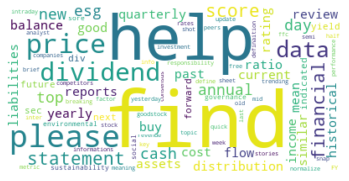

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [ ]:
 features, targets = intentdf['fulltext'], intentdf['intent code']
 
 train_features, test_features, train_targets, test_targets = train_test_split( features, targets , test_size=0.20, random_state=42, shuffle = True,
        stratify=targets)


In [10]:
import tensorflow_hub as hub


In [ ]:
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [20]:
seq_len = 512
num_samples = len(intentdf)

Xids = np.zeros((num_samples, seq_len))
Xmask = np.zeros((num_samples, seq_len))

Xids.shape

(5196, 512)

In [11]:
from transformers import BertTokenizer

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
counts = intentdf["fulltext"].str.findall(r"(\w+)").explode().value_counts()

In [ ]:
newwords= counts.index.tolist()

In [ ]:
tokenizer.add_tokens(newwords)

14

In [14]:
intentdf= pd.read_pickle('traineddf.pkl')

In [17]:
intentdf.head(1)

,Document,Topic,Name,CustomName,Top_n_words,Probability,Representative_document,predict,label,score
24,we anticipate that the ongoing debate over lon...,1,1_climate change_of climate_physical risks_ext...,Environmental,climate change - of climate - physical risks -...,1.0,False,"[{'label': 'Environmental', 'score': 0.9903571...",Environmental,0.990357


In [ ]:
# create mask and ids and labels


In [21]:
for i, text, in enumerate(intentdf['Document']):
  tokens = tokenizer.encode_plus(text,max_length=seq_len, truncation=True,
                                padding ="max_length", add_special_tokens= True,
                                return_tensors= 'tf' )
  Xids[i, :] = tokens["input_ids"]
  Xmask[i, :] = tokens["attention_mask"]

In [22]:
tokens["attention_mask"]

<tf.Tensor: shape=(1, 512), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
arr = intentdf['intent code'].values

In [24]:
col='CustomName'

In [25]:
intentdf["label"] = np.where(intentdf[col] == 'Environmental', 0,(np.where(intentdf[col]=='Social',1,2)))

In [27]:
arr = intentdf['label'].values

In [29]:
labels = np.zeros((num_samples, arr.max()+1))

In [30]:
labels[np.arange(num_samples), arr]= 1

In [31]:
labels[0]

array([1., 0., 0.])

create tf  dataset

In [32]:
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

In [ ]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(64,), dtype=tf.float64, name=None), TensorSpec(shape=(64,), dtype=tf.float64, name=None), TensorSpec(shape=(18,), dtype=tf.float64, name=None))>

In [33]:
def map_fun(input_ids, masks, labels):
  return {'input_ids': input_ids,"attention_mask":masks}, labels

In [34]:
dataset = dataset.map(map_fun)

In [ ]:
dataset

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(64,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(64,), dtype=tf.float64, name=None)}, TensorSpec(shape=(18,), dtype=tf.float64, name=None))>

In [ ]:
598598/46

13013.0

In [35]:
batch_size =  3

dataset = dataset.shuffle(1000).batch(batch_size, drop_remainder = True)

In [36]:
import gc
gc.collect()

11

In [37]:
split =0.8

size = int((num_samples/ batch_size) * split)

In [ ]:
(num_samples/ batch_size) * 0.70

279.06666666666666

In [ ]:
size

318

In [38]:
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

In [ ]:
del dataset

In [39]:
from transformers import TFAutoModel

In [40]:
bert = TFAutoModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [41]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [42]:
input_ids = tf.keras.layers.Input(shape = (seq_len,), name= 'input_ids', dtype = 'int32')
mask = tf.keras.layers.Input(shape = (seq_len,), name= 'attention_mask', dtype = 'int32')

embeddings = bert.bert(input_ids, attention_mask=mask)[1]

x= tf.keras.layers.Dense(1024, activation ='relu')(embeddings)
y= tf.keras.layers.Dense(arr.max()+1, activation='softmax', name= 'outputs')(x)

In [43]:
model =tf.keras.Model(inputs =[input_ids, mask], outputs=y)

In [44]:
# set bert layes non trainable
model.layers[2].trainable = False

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 512,                                           

In [45]:
optimzer = tf.keras.optimizers.Adam()#lr= 1e-5, decay = 1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc =tf.keras.metrics.CategoricalAccuracy("accuracy")

In [46]:
model.compile(optimizer=optimzer, loss=loss, metrics=['accuracy'])

In [48]:
history = model.fit(  
    train_ds,
   validation_data = val_ds, 
   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],
epochs =20    
)

Epoch 1/20
1385/1385 [==============================] - 279s 201ms/step - loss: 0.6428 - accuracy: 0.7475 - val_loss: 0.5136 - val_accuracy: 0.8127
Epoch 2/20
1385/1385 [==============================] - 239s 172ms/step - loss: 0.5067 - accuracy: 0.8094 - val_loss: 0.4639 - val_accuracy: 0.8127
Epoch 3/20
1385/1385 [==============================] - 239s 172ms/step - loss: 0.4257 - accuracy: 0.8313 - val_loss: 0.3514 - val_accuracy: 0.8742
Epoch 4/20
1385/1385 [==============================] - 240s 173ms/step - loss: 0.3831 - accuracy: 0.8563 - val_loss: 0.3163 - val_accuracy: 0.8790
Epoch 5/20
1385/1385 [==============================] - 277s 200ms/step - loss: 0.3554 - accuracy: 0.8647 - val_loss: 0.2540 - val_accuracy: 0.9059
Epoch 6/20
1385/1385 [==============================] - 239s 172ms/step - loss: 0.3534 - accuracy: 0.8575 - val_loss: 0.3804 - val_accuracy: 0.8598
Epoch 7/20
1385/1385 [==============================] - 239s 173ms/step - loss: 0.3334 - accuracy: 0.8758 - val_

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir log

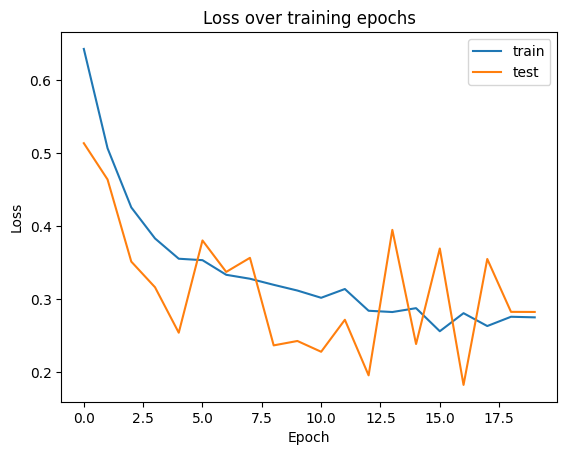

In [49]:
ax = plt.figure().gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

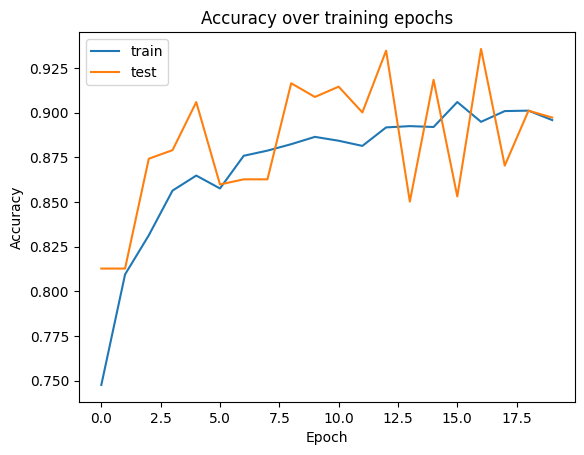

In [50]:
ax = plt.figure().gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [51]:
model.save('bert_esg_model')

In [ ]:
# tokenizer.e

In [ ]:
# make prediciton

In [52]:
from transformers import BertTokenizer

In [57]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')


def prep_data(text):
  tokens = tokenizer.encode_plus(text, max_length = 512,
                                 truncation=True,   padding ="max_length",
                                 add_special_tokens= True, return_token_type_ids= False,
                                return_tensors= 'tf')
  return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)                  
                              }

In [58]:
test= prep_data("get price apple")

In [59]:
model.predict(test)

1/1 [==============================] - 5s 5s/step


array([[0.00459942, 0.99046105, 0.00493956]], dtype=float32)

In [60]:
prob = model.predict(test)

1/1 [==============================] - 0s 96ms/step


In [63]:
testdf= pd.read_pickle('testdftopic2vec_v1.pkl')

In [65]:
testdf["Y_label"] = np.where(testdf['label'] == 'E', 0,(np.where(testdf['label']=='S',1,2)))

In [66]:
testdf.head(1)

,doc,score,id,label,Y_label
0,we divert as much e-waste as possible from lan...,0.825526,99981,E,0


In [82]:
len(predictions)

15934

In [ ]:
#CLASSES_LIST = findlabel.sort_values("intent code")['intent'].tolist()

In [ ]:
predictions = []
labels =  np.array([])
for a in testdf['doc'].tolist():
  a = prep_data(a)
  p = model.predict(a)
  predictions.append(p)
  #labels = np.concatenate([labels, np.argmax(b.numpy(), axis=-1)])

In [ ]:
predictions = []
labels =  np.array([])
for a, b in val_ds:
  p = model.predict(a)
  predictions.append(p)
  labels = np.concatenate([labels, np.argmax(b.numpy(), axis=-1)])

In [83]:
y_p=[]
for i in predictions:
  y_p.append(np.argmax(i, axis=1))

In [84]:
y_pred=[]
for i in y_p:
  for a in i:
    y_pred.append(a)


In [88]:
labels= testdf['Y_label'].tolist()

In [90]:
y_pred= np.array(y_pred)

In [92]:
y = labels[:15934]

In [ ]:
labels

array([16., 13.,  8., 16., 12.,  1., 15., 13., 10.,  7.,  9., 11.,  6.,
       15.,  6.,  1., 12.,  0.,  6.,  2., 12.,  7.,  5.,  2., 14.,  7.,
        2.,  8.,  1., 12., 14.,  6.,  5., 12.,  8., 15., 17., 16., 12.,
        9.,  3.,  8.,  1., 15.,  0.,  7.,  6., 13.,  7., 10.,  6., 17.,
        6.,  9.,  3.,  6.,  2., 12., 17.,  5., 17.,  4.,  5.,  6.,  1.,
       17.,  4., 13.,  3., 17., 13., 11.,  6.,  6.,  6.,  2., 12., 17.,
       16., 14., 11.,  5.,  2., 15.,  6.,  9., 10., 10.,  5.,  3.,  9.,
        3., 17.,  6., 17., 11., 15.,  9., 11.,  3., 17.,  0., 14.,  6.,
       13.,  6.,  5., 16., 13., 11., 15.,  6., 17.,  5., 16.,  0.,  5.,
        5.,  0., 14., 11.,  2., 13., 16., 11., 17., 15.,  9.,  7.,  0.,
        8.,  5., 17.,  5.,  1.,  5., 14.,  0.,  8., 13.,  5., 10., 11.,
        1.,  7.,  2., 16., 10.,  0., 16.,  5.,  4.,  5.,  2.,  9.,  9.,
       16., 17.,  5.,  6., 17., 16.,  6.,  0.,  3., 13., 16.,  0.,  2.,
       14.,  8.,  8.,  2.,  5., 14., 12., 17., 10., 11.,  1., 17

In [93]:
print(confusion_matrix(y, y_pred))

[[1928 3006    0]
 [  94 8624  282]
 [ 181 1751   68]]


In [94]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [95]:
print_validation_report(y,y_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.39      0.54      4934
           1       0.64      0.96      0.77      9000
           2       0.19      0.03      0.06      2000

    accuracy                           0.67     15934
   macro avg       0.57      0.46      0.46     15934
weighted avg       0.66      0.67      0.61     15934

Accuracy Score: 0.6664993096523159
Root Mean Square Error: 0.6062827412972258


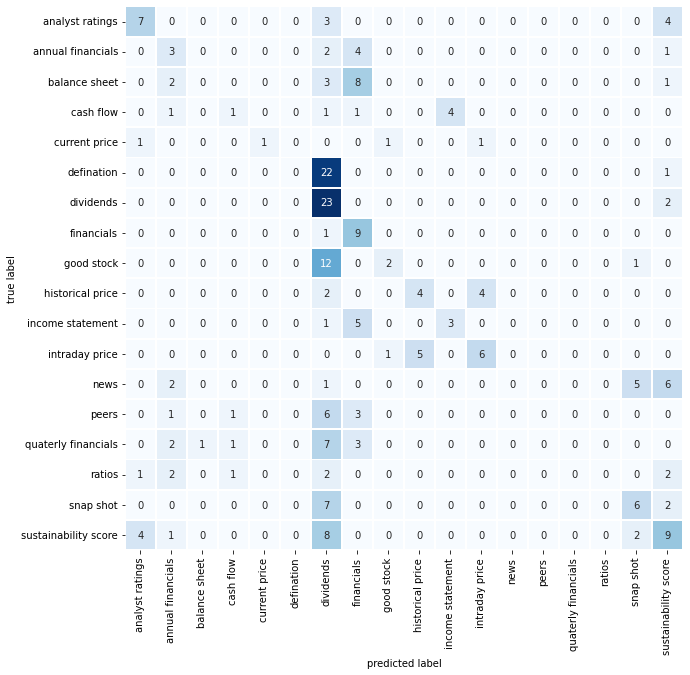

In [ ]:
plot_confusion_matrix_labeled(y,y_pred, CLASSES_LIST=CLASSES_LIST)